In [11]:
from selenium import webdriver
from bs4 import BeautifulSoup as bs

In [12]:
driver = webdriver.Chrome()
driver.get('https://fbref.com/en/comps/9/10728/schedule/2020-2021-Premier-League-Scores-and-Fixtures')
soup = bs(driver.page_source, "lxml")

In [13]:
all_tr_match_url_of_2020_to_2021_pl = soup.find("div", {"id":"content"}).tbody.find_all("tr")

In [14]:
all_tr_match_url_of_2020_to_2021_pl[137].find("td", {"data-stat":"match_report"}).a.get("href")

'/en/matches/b30c816c/Leicester-City-Everton-December-16-2020-Premier-League'

In [16]:
all_pl_match_url_list = list() # list that restore all match report website
for tr in all_tr_match_url_of_2020_to_2021_pl:
    try:
        all_pl_match_url_list.append("https://fbref.com/" + tr.find("td", {"data-stat":"match_report"}).a.get("href"))
    except:
        continue

In [130]:
from tqdm import tqdm

In [131]:
all_data_from_one_match_report_website_list = []
for individual_match_report_website in tqdm(all_pl_match_url_list):
    driver.get(individual_match_report_website)
    soup = bs(driver.page_source, "lxml") # web elements of first match report website
    all_stat_table_of_one_match_report_website = soup.find_all("div", {"class":"table_wrapper"})[0:4]
    single_data_dict = {}
    for individual_stat_table in all_stat_table_of_one_match_report_website:
        for individual_table_data in individual_stat_table.find_all("div", {"class":"table_container"}):
            table_summary_data_row = individual_table_data.find_all("tr")[-1].find_all("td")
            for single_record_data in table_summary_data_row:
                if (individual_stat_table == all_stat_table_of_one_match_report_website[0])|(individual_stat_table == all_stat_table_of_one_match_report_website[1]):
                    single_data_dict["A_" + single_record_data.get("data-stat")] = single_record_data.text
                else:
                    single_data_dict["B_" + single_record_data.get("data-stat")] = single_record_data.text
    all_data_from_one_match_report_website_list.append(single_data_dict)            
        

100%|████████████████████████████████████████████████████████████████████████████████| 380/380 [19:53<00:00,  3.14s/it]


In [174]:
# convert data into dataframe
pl_all_data_df = pd.DataFrame(all_data_from_one_match_report_website_list)

In [134]:
pl_all_data_df.to_csv("Premier_League_2020_to_2021_season_match_report_data.csv")

In [175]:
pl_all_data_df

,A_shirtnumber,A_nationality,A_position,A_age,A_minutes,A_goals,A_assists,A_pens_made,A_pens_att,A_shots_total,...,B_pct_passes_launched_gk,B_passes_length_avg_gk,B_goal_kicks,B_pct_goal_kicks_launched,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk
0,,sk SVK,,23-274,90,0,0,0,0,5,...,0.0,18.4,4,25.0,23.8,9,1,11.1,1,16.5
1,,es ESP,,33-246,90,1,1,0,0,6,...,38.6,32.9,7,42.9,34.0,8,1,12.5,4,25.7
2,,br BRA,,27-346,90,4,1,2,2,20,...,27.7,30.9,12,58.3,42.8,6,0,0.0,2,13.1
3,,pl POL,,35-147,90,0,0,0,0,15,...,70.0,50.1,3,100.0,70.3,18,1,5.6,0,7.7
4,,eng ENG,,27-172,90,0,0,0,0,7,...,18.2,30.5,6,66.7,52.7,4,0,0.0,1,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,,de GER,,29-080,90,2,2,0,0,16,...,24.0,31.5,6,33.3,34.3,5,0,0.0,1,11.9
376,,pl POL,,36-035,90,3,2,0,0,14,...,43.5,35.0,6,66.7,39.8,10,0,0.0,0,4.3
377,,sk SVK,,24-161,90,0,0,0,0,14,...,30.0,34.9,11,36.4,36.3,16,1,6.3,1,8.8
378,,eng ENG,,23-009,90,1,1,0,0,12,...,82.6,62.2,10,90.0,68.8,11,1,9.1,0,13.2


In [164]:
import re

all_possession_stats_from_one_match_report_website_list = []
for individual_match_report_website in tqdm(all_pl_match_url_list):
    driver.get(individual_match_report_website)
    soup = bs(driver.page_source, "lxml") # web elements of first match report website
    
    Possession_Regex_quote = re.compile(r'\d.')
    Possession_for_two_team_list = Possession_Regex_quote.findall(soup.find("div", {"id":"team_stats"}).find_all("tr")[2].text)
    
    Possession_for_two_team_float_list = []
    possession_stats_dict = {}
    for single_possession in Possession_for_two_team_list:
        Possession_for_two_team_float_list.append(float(single_possession))
        
    possession_stats_dict["A_possession"] = Possession_for_two_team_float_list[0]
    possession_stats_dict["B_possession"] = Possession_for_two_team_float_list[1]
    
    all_possession_stats_from_one_match_report_website_list.append(possession_stats_dict)         

100%|████████████████████████████████████████████████████████████████████████████████| 380/380 [12:19<00:00,  1.94s/it]


In [165]:
possession_stats_df = pd.DataFrame(all_possession_stats_from_one_match_report_website_list)

In [176]:
possession_stats_df

,A_possession,B_possession
0,45.0,55.0
1,31.0,69.0
2,50.0,50.0
3,59.0,41.0
4,37.0,63.0
...,...,...
375,55.0,45.0
376,37.0,63.0
377,64.0,36.0
378,41.0,59.0


In [177]:
pl_all_data_df = pd.concat([pl_all_data_df, possession_stats_df], axis = 1)

In [178]:
pl_all_data_df

,A_shirtnumber,A_nationality,A_position,A_age,A_minutes,A_goals,A_assists,A_pens_made,A_pens_att,A_shots_total,...,B_goal_kicks,B_pct_goal_kicks_launched,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk,A_possession,B_possession
0,,sk SVK,,23-274,90,0,0,0,0,5,...,4,25.0,23.8,9,1,11.1,1,16.5,45.0,55.0
1,,es ESP,,33-246,90,1,1,0,0,6,...,7,42.9,34.0,8,1,12.5,4,25.7,31.0,69.0
2,,br BRA,,27-346,90,4,1,2,2,20,...,12,58.3,42.8,6,0,0.0,2,13.1,50.0,50.0
3,,pl POL,,35-147,90,0,0,0,0,15,...,3,100.0,70.3,18,1,5.6,0,7.7,59.0,41.0
4,,eng ENG,,27-172,90,0,0,0,0,7,...,6,66.7,52.7,4,0,0.0,1,14.7,37.0,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,,de GER,,29-080,90,2,2,0,0,16,...,6,33.3,34.3,5,0,0.0,1,11.9,55.0,45.0
376,,pl POL,,36-035,90,3,2,0,0,14,...,6,66.7,39.8,10,0,0.0,0,4.3,37.0,63.0
377,,sk SVK,,24-161,90,0,0,0,0,14,...,11,36.4,36.3,16,1,6.3,1,8.8,64.0,36.0
378,,eng ENG,,23-009,90,1,1,0,0,12,...,10,90.0,68.8,11,1,9.1,0,13.2,41.0,59.0


# Data Clean

In [22]:
### Data Clean
pl_all_data_df.drop(["A_shirtnumber", 
                     "B_shirtnumber", 
                     "A_nationality", 
                     "B_nationality", 
                     "A_position", 
                     "B_position", 
                     "A_age", 
                     "B_age", 
                     "A_minutes", 
                     "B_minutes", 
                     #"A_goals", 
                     #"B_goals", 
                     #"A_assists", 
                     #"B_assists", 
                     #"A_pens_made", 
                     #"B_pens_made", 
                     #"A_pens_att", 
                     #"B_pens_att", 
                     "A_xg", 
                     "B_xg", 
                     "A_npxg", 
                     "B_npxg", 
                     "A_xa", 
                     "B_xa", 
                     "A_sca", 
                     "B_sca", 
                     "A_gca", 
                     "B_gca" ], axis = 1, inplace = True)

In [24]:
pl_all_data_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [27]:
pl_all_data_df.to_csv("Premier_League_2020_to_2021_season_match_report_data_cleaned.csv")

In [1]:
import pandas as pd

In [32]:
pl_all_data_df

,A_goals,A_assists,A_pens_made,A_pens_att,A_shots_total,A_shots_on_target,A_cards_yellow,A_cards_red,A_touches,A_pressures,...,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk,A_possession,B_possession,A_shots_on_target%,B_shots_on_target%
0,0,0,0,0,5,2,2,0,630,148,...,23.8,9,1,11.1,1,16.5,45.0,55.0,0.400000,0.384615
1,1,1,0,0,6,3,2,0,420,119,...,34.0,8,1,12.5,4,25.7,31.0,69.0,0.500000,0.555556
2,4,1,2,2,20,4,1,0,623,174,...,42.8,6,0,0.0,2,13.1,50.0,50.0,0.200000,0.500000
3,0,0,0,0,15,3,2,0,619,139,...,70.3,18,1,5.6,0,7.7,59.0,41.0,0.200000,0.187500
4,0,0,0,0,7,1,1,0,467,113,...,52.7,4,0,0.0,1,14.7,37.0,63.0,0.142857,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,0,0,16,4,0,0,694,131,...,34.3,5,0,0.0,1,11.9,55.0,45.0,0.250000,0.200000
376,3,2,0,0,14,7,0,0,456,215,...,39.8,10,0,0.0,0,4.3,37.0,63.0,0.500000,0.294118
377,0,0,0,0,14,0,1,0,743,134,...,36.3,16,1,6.3,1,8.8,64.0,36.0,0.000000,0.375000
378,1,1,0,0,12,3,3,0,519,117,...,68.8,11,1,9.1,0,13.2,41.0,59.0,0.250000,0.300000


In [29]:
len(pl_all_data_df.columns)

258

In [30]:
pl_all_data_df.insert(len(pl_all_data_df.columns), "A_shots_on_target%", 0)
pl_all_data_df.insert(len(pl_all_data_df.columns), "B_shots_on_target%", 0)

In [31]:
for row in range(len(pl_all_data_df)):
    pl_all_data_df.iloc[row, -2] = (pl_all_data_df["A_shots_on_target"][row])/(pl_all_data_df["A_shots_total"][row])
    pl_all_data_df.iloc[row, -1] = (pl_all_data_df["B_shots_on_target"][row])/(pl_all_data_df["B_shots_total"][row])

C:\Users\USER\anaconda3\envs\tensorflowgpuenv\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in longlong_scalars
  


In [33]:
pl_all_data_df.to_csv("Premier_League_2020_to_2021_season_match_report_data_cleaned.csv")

# Missing Values Imputation

In [75]:
pl_all_data_df.describe().T[pl_all_data_df.describe().T["count"] != 380.0]

,count,mean,std,min,25%,50%,75%,max


In [46]:
(pl_all_data_df["A_save_pct"].sum() + pl_all_data_df["B_save_pct"].sum())/(pl_all_data_df["A_save_pct"].count() + pl_all_data_df["B_save_pct"].count())

70.70095367847412

In [60]:
### save_pct
pl_all_data_df["A_save_pct"].fillna(pd.concat([pl_all_data_df["A_save_pct"], pl_all_data_df["B_save_pct"]], axis = 0, ignore_index = True).median(), inplace = True)
pl_all_data_df["B_save_pct"].fillna(pd.concat([pl_all_data_df["A_save_pct"], pl_all_data_df["B_save_pct"]], axis = 0, ignore_index = True).median(), inplace = True)

In [64]:
### passes_pct_launched_gk
pd.concat([pl_all_data_df["A_passes_pct_launched_gk"], pl_all_data_df["B_passes_pct_launched_gk"]], axis = 0, ignore_index = True)
pl_all_data_df["A_passes_pct_launched_gk"].fillna(pd.concat([pl_all_data_df["A_passes_pct_launched_gk"], pl_all_data_df["B_passes_pct_launched_gk"]], axis = 0, ignore_index = True).median(), inplace = True)

In [66]:
### pct_goal_kicks_launched
pd.concat([pl_all_data_df["A_pct_goal_kicks_launched"], pl_all_data_df["B_pct_goal_kicks_launched"]], axis = 0, ignore_index = True)
pl_all_data_df["A_pct_goal_kicks_launched"].fillna(pd.concat([pl_all_data_df["A_pct_goal_kicks_launched"], pl_all_data_df["B_pct_goal_kicks_launched"]], axis = 0, ignore_index = True).median(), inplace = True)
pl_all_data_df["B_pct_goal_kicks_launched"].fillna(pd.concat([pl_all_data_df["A_pct_goal_kicks_launched"], pl_all_data_df["B_pct_goal_kicks_launched"]], axis = 0, ignore_index = True).median(), inplace = True)

In [68]:
### goal_kick_length_avg
pl_all_data_df["A_goal_kick_length_avg"].fillna(pd.concat([pl_all_data_df["A_goal_kick_length_avg"], pl_all_data_df["B_goal_kick_length_avg"]], axis = 0, ignore_index = True).median(), inplace = True)
pl_all_data_df["B_goal_kick_length_avg"].fillna(pd.concat([pl_all_data_df["B_goal_kick_length_avg"], pl_all_data_df["B_goal_kick_length_avg"]], axis = 0, ignore_index = True).median(), inplace = True)

In [70]:
### avg_distance_def_actions_gk
pl_all_data_df["A_avg_distance_def_actions_gk"].fillna(pd.concat([pl_all_data_df["A_avg_distance_def_actions_gk"], pl_all_data_df["B_avg_distance_def_actions_gk"]], axis = 0, ignore_index = True).median(), inplace = True)
pl_all_data_df["B_avg_distance_def_actions_gk"].fillna(pd.concat([pl_all_data_df["A_avg_distance_def_actions_gk"], pl_all_data_df["B_avg_distance_def_actions_gk"]], axis = 0, ignore_index = True).median(), inplace = True)

In [72]:
### crosses_stopped_pct_gk
pl_all_data_df["B_crosses_stopped_pct_gk"].fillna(pd.concat([pl_all_data_df["A_crosses_stopped_pct_gk"], pl_all_data_df["B_crosses_stopped_pct_gk"]], axis = 0, ignore_index = True).median(), inplace = True)

In [74]:
### shots_on_target%
pl_all_data_df["A_shots_on_target%"].fillna(pd.concat([pl_all_data_df["A_shots_on_target%"], pl_all_data_df["B_shots_on_target%"]], axis = 0, ignore_index = True).median(), inplace = True)

In [79]:
pl_all_data_df.to_csv("Premier_League_2020_to_2021_season_match_report_data_imputed.csv")

# Outlier Detection

In [37]:
pl_all_data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A_goals,380.0,1.305263,1.279625,0.0,0.000000,1.000000,2.000000,8.0
A_assists,380.0,0.881579,1.062271,0.0,0.000000,1.000000,1.000000,6.0
A_pens_made,380.0,0.142105,0.371570,0.0,0.000000,0.000000,0.000000,2.0
A_pens_att,380.0,0.165789,0.412711,0.0,0.000000,0.000000,0.000000,2.0
A_shots_total,380.0,12.657895,5.466020,0.0,9.000000,12.000000,16.000000,29.0
...,...,...,...,...,...,...,...,...
B_avg_distance_def_actions_gk,375.0,14.156800,4.813373,2.0,10.750000,13.800000,17.100000,40.0
A_possession,380.0,51.473684,12.598398,18.0,42.000000,51.000000,62.000000,78.0
B_possession,380.0,48.528947,12.601324,22.0,38.000000,49.000000,58.000000,82.0
A_shots_on_target%,379.0,0.344998,0.165968,0.0,0.235294,0.333333,0.447222,1.0


In [15]:
### outlier detection 
### the value shouldn't be negative
pl_all_data_df.describe().T[pl_all_data_df.describe().T["min"] < 0]

,count,mean,std,min,25%,50%,75%,max
B_save_pct,380.0,72.056053,27.127082,-100.0,56.725,75.0,100.0,100.0


In [19]:
### handling outlier
pl_all_data_df[pl_all_data_df["B_save_pct"] == -100]

### the 137th row contain the outlier in column "B_save_pct" 

,A_goals,A_assists,A_pens_made,A_pens_att,A_shots_total,A_shots_on_target,A_cards_yellow,A_cards_red,A_touches,A_pressures,...,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk,A_possession,B_possession,A_shots_on_target%,B_shots_on_target%
137,1,1,0,0,10,1,2,0,656,137,...,14.6,13,1,7.7,0,18.0,54.0,46.0,0.1,0.444444


In [22]:
pl_all_data_df["B_save_pct"].median()

75.0

In [23]:
### assign the median of column "B_save_pct" to the cell which contain negative outlier
pl_all_data_df.loc[137, "B_save_pct"] = pl_all_data_df["B_save_pct"].median()

In [39]:
### outlier detection 
pl_all_data_df.describe().T[pl_all_data_df.describe().T["min"] > 100]

,count,mean,std,min,25%,50%,75%,max
A_touches,380.0,631.602632,137.894677,313.0,523.00,620.0,722.00,1022.0
A_passes_completed,380.0,418.918421,146.421415,137.0,307.00,415.0,515.25,852.0
A_passes,380.0,517.600000,143.514088,208.0,413.50,511.5,611.25,944.0
A_carries,380.0,399.805263,132.140203,131.0,303.00,390.5,501.50,810.0
A_passes_total_distance,380.0,8171.852632,2703.460993,2738.0,6118.50,8055.5,10084.75,15629.0
A_passes_progressive_distance,380.0,2594.810526,527.496858,1246.0,2239.50,2556.5,2957.50,4050.0
A_passes_live,380.0,471.878947,144.404961,174.0,366.25,461.0,565.25,901.0
A_passes_right_foot,380.0,314.381579,112.083361,114.0,230.75,295.0,398.00,663.0
A_touches_mid_3rd,380.0,298.928947,95.703603,101.0,225.75,288.0,358.25,639.0
A_touches_live_ball,380.0,587.081579,138.818977,279.0,475.75,576.0,677.25,980.0


In [12]:
### outlier detection 
pl_all_data_df.describe().T[pl_all_data_df.describe().T["max"] <= 0]

,count,mean,std,min,25%,50%,75%,max


In [17]:
### outlier detection 
pl_all_data_df.describe().T[pl_all_data_df.describe().T["25%"] == 0]

,count,mean,std,min,25%,50%,75%,max
A_goals,380.0,1.305263,1.279625,0.0,0.0,1.0,2.0,8.0
A_assists,380.0,0.881579,1.062271,0.0,0.0,1.0,1.0,6.0
A_pens_made,380.0,0.142105,0.371570,0.0,0.0,0.0,0.0,2.0
A_pens_att,380.0,0.165789,0.412711,0.0,0.0,0.0,0.0,2.0
A_cards_red,380.0,0.052632,0.223591,0.0,0.0,0.0,0.0,1.0
A_through_balls,380.0,0.944737,1.245403,0.0,0.0,1.0,1.0,8.0
A_corner_kicks_out,380.0,1.957895,1.966290,0.0,0.0,1.0,3.0,10.0
A_corner_kicks_straight,380.0,0.447368,0.995965,0.0,0.0,0.0,1.0,9.0
A_blocked_shots_saves,380.0,0.068421,0.263030,0.0,0.0,0.0,0.0,2.0
A_errors,380.0,0.247368,0.520674,0.0,0.0,0.0,0.0,2.0


In [5]:
### correlation between features
pl_all_data_df.corr()

,A_goals,A_assists,A_pens_made,A_pens_att,A_shots_total,A_shots_on_target,A_cards_yellow,A_cards_red,A_touches,A_pressures,...,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk,A_possession,B_possession,A_shots_on_target%,B_shots_on_target%
A_goals,1.000000,0.857445,0.296975,0.268633,0.291857,0.601553,-0.132362,-0.047081,0.134953,-0.006163,...,0.036976,-0.152321,-0.176680,-0.137049,0.002111,-0.021169,0.130943,-0.130962,0.422220,-0.011620
A_assists,0.857445,1.000000,0.002639,-0.003247,0.236117,0.506302,-0.150730,-0.051452,0.128504,-0.009331,...,0.054137,-0.124099,-0.124531,-0.107768,-0.012827,-0.037407,0.107512,-0.107464,0.373879,0.002141
A_pens_made,0.296975,0.002639,1.000000,0.929927,0.004513,0.055440,0.024014,0.005015,-0.032882,0.052052,...,-0.048054,-0.155797,-0.056779,0.005040,0.024038,0.097650,-0.012726,0.012643,0.047597,-0.023663
A_pens_att,0.268633,-0.003247,0.929927,1.000000,-0.019237,0.026053,0.026160,0.019564,-0.039267,0.031798,...,-0.084719,-0.178203,-0.061826,0.005905,0.025249,0.113643,-0.041531,0.041438,0.032724,-0.026676
A_shots_total,0.291857,0.236117,0.004513,-0.019237,1.000000,0.681827,-0.053226,-0.097492,0.442491,-0.186525,...,0.258210,0.317962,0.155484,0.047852,-0.080468,-0.159992,0.554907,-0.554957,-0.111514,0.049233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
B_avg_distance_def_actions_gk,-0.021169,-0.037407,0.097650,0.113643,-0.159992,-0.107446,0.090313,0.028835,-0.248037,0.030146,...,-0.102876,-0.189623,0.051928,0.100078,0.576345,1.000000,-0.267310,0.267228,0.021418,0.039932
A_possession,0.130943,0.107512,-0.012726,-0.041531,0.554907,0.346971,-0.110791,-0.186843,0.919673,-0.294607,...,0.480940,0.385601,0.148633,0.001301,-0.175523,-0.267310,1.000000,-0.999992,-0.108461,0.072833
B_possession,-0.130962,-0.107464,0.012643,0.041438,-0.554957,-0.347079,0.110495,0.186750,-0.919654,0.294643,...,-0.481065,-0.385660,-0.148541,-0.001111,0.175332,0.267228,-0.999992,1.000000,0.108315,-0.072639
A_shots_on_target%,0.422220,0.373879,0.047597,0.032724,-0.111514,0.543779,-0.047762,0.083581,-0.052683,0.098797,...,-0.109759,-0.311282,-0.131713,-0.048344,0.008778,0.021418,-0.108461,0.108315,1.000000,-0.076337


In [6]:
pl_all_data_corr_df = pl_all_data_df.corr()

In [7]:
pl_all_data_corr_df.to_csv("Premier_League_2020_to_2021_season_match_report_data_features_corr.csv")

In [1]:
import pandas as pd

In [2]:
pl_all_data_df = pd.read_csv("Premier_League_2020_to_2021_season_match_report_data_imputed.csv")

In [3]:
pl_all_data_df.drop("Unnamed: 0", axis = 1, inplace = True)

In [4]:
pl_all_data_df

,A_goals,A_assists,A_pens_made,A_pens_att,A_shots_total,A_shots_on_target,A_cards_yellow,A_cards_red,A_touches,A_pressures,...,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk,A_possession,B_possession,A_shots_on_target%,B_shots_on_target%
0,0,0,0,0,5,2,2,0,630,148,...,23.8,9,1,11.1,1,16.5,45.0,55.0,0.400000,0.384615
1,1,1,0,0,6,3,2,0,420,119,...,34.0,8,1,12.5,4,25.7,31.0,69.0,0.500000,0.555556
2,4,1,2,2,20,4,1,0,623,174,...,42.8,6,0,0.0,2,13.1,50.0,50.0,0.200000,0.500000
3,0,0,0,0,15,3,2,0,619,139,...,70.3,18,1,5.6,0,7.7,59.0,41.0,0.200000,0.187500
4,0,0,0,0,7,1,1,0,467,113,...,52.7,4,0,0.0,1,14.7,37.0,63.0,0.142857,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,0,0,16,4,0,0,694,131,...,34.3,5,0,0.0,1,11.9,55.0,45.0,0.250000,0.200000
376,3,2,0,0,14,7,0,0,456,215,...,39.8,10,0,0.0,0,4.3,37.0,63.0,0.500000,0.294118
377,0,0,0,0,14,0,1,0,743,134,...,36.3,16,1,6.3,1,8.8,64.0,36.0,0.000000,0.375000
378,1,1,0,0,12,3,3,0,519,117,...,68.8,11,1,9.1,0,13.2,41.0,59.0,0.250000,0.300000


In [16]:
training_data_df

,A_pens_made,A_pens_att,A_shots_total,A_shots_on_target,A_cards_yellow,A_cards_red,A_touches,A_pressures,A_tackles,A_interceptions,...,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk,A_possession,B_possession,A_shots_on_target%,B_shots_on_target%
0,0,0,5,2,2,0,630,148,13,2,...,23.8,9,1,11.1,1,16.5,45.0,55.0,0.400000,0.384615
1,0,0,6,3,2,0,420,119,18,7,...,34.0,8,1,12.5,4,25.7,31.0,69.0,0.500000,0.555556
2,2,2,20,4,1,0,623,174,13,7,...,42.8,6,0,0.0,2,13.1,50.0,50.0,0.200000,0.500000
3,0,0,15,3,2,0,619,139,18,2,...,70.3,18,1,5.6,0,7.7,59.0,41.0,0.200000,0.187500
4,0,0,7,1,1,0,467,113,14,6,...,52.7,4,0,0.0,1,14.7,37.0,63.0,0.142857,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,0,0,16,4,0,0,694,131,12,9,...,34.3,5,0,0.0,1,11.9,55.0,45.0,0.250000,0.200000
376,0,0,14,7,0,0,456,215,14,14,...,39.8,10,0,0.0,0,4.3,37.0,63.0,0.500000,0.294118
377,0,0,14,0,1,0,743,134,15,17,...,36.3,16,1,6.3,1,8.8,64.0,36.0,0.000000,0.375000
378,0,0,12,3,3,0,519,117,16,15,...,68.8,11,1,9.1,0,13.2,41.0,59.0,0.250000,0.300000


In [17]:
target_data_A_goals_df

0      0
1      1
2      4
3      0
4      0
      ..
375    2
376    3
377    0
378    1
379    2
Name: A_goals, Length: 380, dtype: int64

In [19]:
### apply PCA 
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.decomposition import PCA

In [11]:
target_data_A_goals_df = pl_all_data_df["A_goals"]

In [13]:
training_data_df = pl_all_data_df.copy()

In [14]:
### drop goals, assists, goal_against_gk, psxg_gk, 
training_data_df.drop(["A_goals", "A_assists", "B_goals", "B_assists", "A_goals_against_gk", "B_goals_against_gk", "A_psxg_gk", "B_psxg_gk"], axis = 1, inplace = True)

In [93]:
training_data_df.to_csv("training_data.csv")

In [20]:
scaler = StandardScaler()
scaled_training_data_df = scaler.fit_transform(training_data_df)

In [21]:
pca = PCA(n_components = 252)

In [22]:
pca_training_data = pca.fit_transform(scaled_training_data_df)

In [23]:
training_data_df.columns

Index(['A_pens_made', 'A_pens_att', 'A_shots_total', 'A_shots_on_target',
       'A_cards_yellow', 'A_cards_red', 'A_touches', 'A_pressures',
       'A_tackles', 'A_interceptions',
       ...
       'B_goal_kick_length_avg', 'B_crosses_gk', 'B_crosses_stopped_gk',
       'B_crosses_stopped_pct_gk', 'B_def_actions_outside_pen_area_gk',
       'B_avg_distance_def_actions_gk', 'A_possession', 'B_possession',
       'A_shots_on_target%', 'B_shots_on_target%'],
      dtype='object', length=252)

In [24]:
### rotation of PCs
pca_training_data

array([[ 6.33664957e+00, -7.68954955e+00, -4.17103783e+00, ...,
         2.95649160e-16,  5.94812148e-16,  3.32493536e-16],
       [ 1.01913536e+01,  9.75310505e+00,  4.02695140e+00, ...,
         3.62974734e-16,  4.30387572e-16, -7.17522706e-16],
       [-3.68020793e+00,  1.83430651e+00,  8.57755245e+00, ...,
        -2.16000208e-16, -9.90432756e-16, -3.30646141e-16],
       ...,
       [-7.98279703e+00, -2.43158645e+00, -2.70250048e+00, ...,
        -2.60019971e-16, -1.65420312e-16, -3.24113227e-16],
       [ 4.59567305e+00,  9.54630616e+00, -2.85221073e+00, ...,
        -6.49135892e-17, -1.03484266e-16,  1.30922548e-16],
       [-1.32019536e+01,  2.25025318e+00,  4.68903431e+00, ...,
        -6.90770698e-17,  6.81571238e-16,  5.30528576e-17]])

In [25]:
pc_rotation = pd.DataFrame(pca_training_data, columns = training_data_df.columns)

In [26]:
pc_rotation

,A_pens_made,A_pens_att,A_shots_total,A_shots_on_target,A_cards_yellow,A_cards_red,A_touches,A_pressures,A_tackles,A_interceptions,...,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk,A_possession,B_possession,A_shots_on_target%,B_shots_on_target%
0,6.336650,-7.689550,-4.171038,1.432297,-0.822641,-1.344648,0.503070,-0.275261,0.607200,1.045047,...,-4.192084e-16,1.126388e-15,5.349209e-16,8.799407e-16,-6.822302e-16,-7.813092e-16,-5.237446e-17,2.956492e-16,5.948121e-16,3.324935e-16
1,10.191354,9.753105,4.026951,5.830561,1.445636,-5.065859,1.700977,-2.740222,1.181959,-0.602571,...,1.007842e-16,-1.192527e-15,5.799751e-16,2.111498e-16,2.123408e-16,-1.710518e-15,2.999793e-16,3.629747e-16,4.303876e-16,-7.175227e-16
2,-3.680208,1.834307,8.577552,11.081601,4.196109,2.108877,0.971346,-4.254767,5.169672,5.495834,...,5.372208e-17,-2.036673e-16,-1.463898e-16,2.147344e-16,4.318095e-17,-6.315769e-16,8.611357e-16,-2.160002e-16,-9.904328e-16,-3.306461e-16
3,-2.244260,2.406796,-3.170899,-2.432042,-2.500172,2.048288,-0.883272,0.586373,2.753621,-1.818958,...,6.670224e-16,6.580069e-16,3.208880e-16,-3.500325e-16,1.972431e-15,-8.255226e-16,-7.837046e-17,-3.270902e-16,-2.363078e-16,2.073935e-16
4,7.242551,0.546294,-1.729859,4.398531,-1.450446,-4.566682,5.480858,3.536119,1.307492,-2.785582,...,1.119154e-16,5.981653e-16,-4.236846e-16,-2.859733e-16,-9.721975e-16,-6.513569e-16,-1.669482e-15,-8.121292e-16,5.095640e-16,1.572658e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,-4.108869,-6.500630,-1.811985,4.229902,1.873502,-0.477358,1.980016,-0.563398,-2.724558,-0.691133,...,4.842716e-16,1.261440e-15,5.227406e-16,-9.005382e-16,5.458991e-16,-4.320633e-16,-6.568307e-16,1.526535e-16,2.676580e-16,2.532470e-16
376,6.806825,1.438088,2.652300,2.694199,1.174105,1.806844,-0.154129,1.111913,-1.738895,-4.506241,...,-8.346096e-16,-6.117056e-16,-9.108590e-16,5.701107e-16,-1.081393e-16,2.186721e-16,-5.389102e-16,5.263306e-16,-9.188584e-16,-4.298432e-16
377,-7.982797,-2.431586,-2.702500,1.961901,-2.165172,-0.916925,2.528420,1.167260,-2.884321,1.269942,...,1.127044e-15,-6.355152e-17,-7.597808e-16,5.309150e-16,3.687822e-16,5.799414e-16,-1.054181e-16,-2.600200e-16,-1.654203e-16,-3.241132e-16
378,4.595673,9.546306,-2.852211,-2.338907,2.065210,0.249962,-1.813866,-2.865577,-0.595553,-2.648151,...,-5.166371e-16,-3.197062e-16,-2.632425e-16,2.784757e-16,-2.494836e-16,-1.385511e-16,-1.520629e-16,-6.491359e-17,-1.034843e-16,1.309225e-16


In [16]:
print(pca.explained_variance_ratio_)

[2.62823464e-01 6.24672508e-02 4.52471338e-02 2.83657856e-02
 2.73714668e-02 2.32746417e-02 2.14894995e-02 1.98065266e-02
 1.83456949e-02 1.69812735e-02 1.54331149e-02 1.51624945e-02
 1.45190088e-02 1.38384567e-02 1.35372525e-02 1.29240293e-02
 1.25054897e-02 1.18165192e-02 1.10103423e-02 1.06184081e-02
 1.02317184e-02 1.00455712e-02 9.46104733e-03 9.26369942e-03
 8.72915594e-03 8.36630597e-03 8.22914221e-03 7.98104117e-03
 7.69753924e-03 7.63641059e-03 7.50637950e-03 7.08780706e-03
 6.92560840e-03 6.69693153e-03 6.33850084e-03 6.17811993e-03
 6.06890316e-03 5.72853312e-03 5.58133347e-03 5.35114503e-03
 5.22677441e-03 5.02052586e-03 5.01192233e-03 4.97960871e-03
 4.86739996e-03 4.74415917e-03 4.59978773e-03 4.45043206e-03
 4.41480459e-03 4.16151327e-03 4.14278206e-03 3.92783413e-03
 3.74587178e-03 3.71869589e-03 3.64445175e-03 3.58002261e-03
 3.48589346e-03 3.38989006e-03 3.37601900e-03 3.33158529e-03
 3.27683281e-03 3.13655501e-03 3.04844307e-03 2.88724150e-03
 2.86668441e-03 2.811022

In [17]:
print(pca.n_components_)

252


In [18]:
pca.n_features_

252

In [19]:
pca.n_samples_

380

In [20]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Cumulative explained variance')

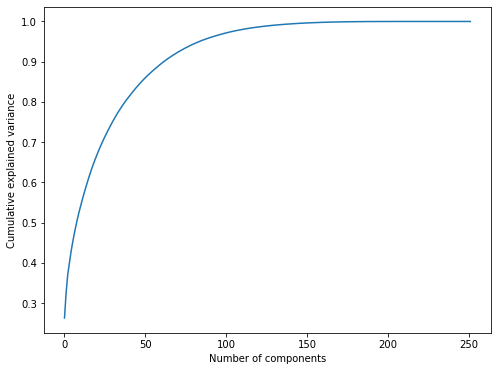

In [21]:
plt.figure(figsize=(8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

In [ ]:
### There are 252 principle component, the first 50 principle components accout for 85% variance

In [ ]:
### Fitting Linear Model using statsmodel 

In [8]:
import statsmodels.api as sm

In [15]:
y = target_data_A_goals_df
x = sm.add_constant(training_data_df) # 以statsmodels的語法將x轉換為要匯入迴歸模型中的資料
model = sm.OLS(y, x).fit() # 將y,x進行迴歸模型配適
predictions = model.predict(x) # 給定x，並透過配適後的模型來預測y
print_model = model.summary() # 列出配適後模型的資訊

print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                A_goals   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     115.8
Date:                Tue, 28 Dec 2021   Prob (F-statistic):          2.88e-115
Time:                        14:58:39   Log-Likelihood:                 354.02
No. Observations:                 380   AIC:                            -246.0
Df Residuals:                     149   BIC:                             664.1
Df Model:                         230                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                              -126.3757    114.452     -1.104      0.271    -352.533      99.782
A_pens_made                           0.5376      0.100      5.353      0.000       0.339       0.736
A_pens_att                            0.2155      0.198      1.087      0.279      -0.176       0.607
A_shots_total                        -0.0071      0.010     -0.738      0.462      -0.026       0.012
A_shots_on_target                    -0.0869      0.078     -1.116      0.266      -0.241       0.067
A_cards_yellow                       -0.0099      0.013     -0.771      0.442      -0.035       0.015
A_cards_red                          -0.0020      0.085     -0.024      0.981      -0.169       0.165
A_touches                             0.0032      0.010      0.315      0.753      -0.017       0.023
A_pressures                       -9.445e-05      0.002     -0.061      0.951      -0.003       0.003
A_tackles                             0.0522      0.062      0.842      0.401      -0.070       0.175
A_interceptions                      -0.0187      0.033     -0.572      0.568      -0.083       0.046
A_blocks                              0.0020      0.006      0.330      0.742      -0.010       0.014
A_passes_completed                -5.446e-05      0.004     -0.013      0.990      -0.008       0.008
A_passes                             -0.0002      0.011     -0.019      0.985      -0.022       0.021
A_passes_pct                          0.0291      0.030      0.985      0.326      -0.029       0.088
A_progressive_passes                  0.0020      0.009      0.232      0.817      -0.015       0.019
A_carries                            -0.0002      0.000     -0.441      0.660      -0.001       0.001
A_progressive_carries                -0.0008      0.002     -0.334      0.739      -0.005       0.004
A_dribbles_completed                 -0.0113      0.043     -0.264      0.792      -0.096       0.073
A_dribbles                           -0.0954      0.087     -1.093      0.276      -0.268       0.077
A_passes_total_distance            7.879e-05      0.000      0.605      0.546      -0.000       0.000
A_passes_progressive_distance       5.89e-05   9.96e-05      0.591      0.555      -0.000       0.000
A_passes_completed_short             -0.0055      0.009     -0.579      0.564      -0.024       0.013
A_passes_short                        0.0059      0.008      0.731      0.466      -0.010       0.022
A_passes_pct_short                    0.0104      0.014      0.748      0.456      -0.017       0.038
A_passes_completed_medium          5.831e-05      0.010      0.006      0.995      -0.019       0.019
A_passes_medium                       0.0004      0.008      0.057      0.954      -0.015       0.016
A_passes_pct_medium    

In [16]:
from statsmodels.tools.eval_measures import mse

In [17]:
# fit your model which you have already done

# now generate predictions

# calc mse
mse = mse(y, predictions)

In [18]:
mse

0.009084952321582317

In [23]:
### Fitting linear model using sklearn
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
target_data_A_goals_arr = np.array(target_data_A_goals_df)
training_data_arr = np.array(training_data_df)

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(training_data_df, target_data_A_goals_df, test_size=0.20)

In [26]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_pred = regr.predict(X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)

# intercept
print('Intercept: \n', regr.intercept_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))


Coefficients: 
 [ 2.71702516e-01  1.22468320e-01  1.24857381e-02 -5.01618443e-02
  2.62765990e-03  4.15259905e-03  3.67651399e-03  1.14642332e-03
  5.06515262e-02 -1.38508707e-02  1.39692233e-02 -5.30865061e-03
  9.96407514e-03  4.94043828e-02 -5.64458068e-04 -5.41275049e-04
 -6.84856679e-04 -4.88363663e-02 -1.48164513e-01  3.40600915e-04
  5.17703460e-05  1.53144447e-02 -1.14670074e-02 -1.76051892e-02
  9.37075543e-04 -2.23168387e-03 -3.28295871e-03  1.03227344e-02
 -1.35097541e-02 -2.19867157e-02 -9.06781222e-03  4.63742701e-03
  1.30946348e-03  4.36848882e-04  8.74007698e-03  1.22399815e-03
 -8.71524121e-03 -9.36294074e-03 -2.39063248e-03  1.17290565e-03
  8.51460111e-03  3.30978626e-02 -3.39342458e-02 -2.92139762e-02
 -2.41377171e-02  3.00249298e-03  4.99494660e-03  1.96663555e-03
 -1.14241950e-02 -1.06351118e-02 -1.61417721e-02 -1.09940601e-02
 -1.09503285e-02  3.16341077e-02  9.66167038e-03  9.74105657e-03
  1.58073551e-02 -2.03420142e-02  1.85829137e-02  2.89780715e-02
  3.09054

In [ ]:
### Implementing LASSO to avoid overfitting

In [54]:
model = linear_model.Lasso(alpha=0.1)
model.fit(X_train, y_train)

C:\Users\USER\anaconda3\envs\tensorflowgpuenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 37.94696239820958, tolerance: 0.0495671052631579
  positive)


Lasso(alpha=0.1)

In [55]:
# Make predictions using the testing set
y_pred = model.predict(X_test)

# The coefficients
print('Coefficients: \n', model.coef_)

# intercept
print('Intercept: \n', model.intercept_)

# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  5.03037991e-01
  0.00000000e+00 -0.00000000e+00 -9.81888869e-04  1.71420939e-04
  0.00000000e+00 -6.27021665e-03 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -1.80161745e-03
 -3.73403515e-03  0.00000000e+00  0.00000000e+00  9.63761603e-06
  1.58238523e-04  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -1.23976806e-03 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -1.59359521e-03 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  2.23621231e-03 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00  5.83831971e-05  0.00000000e+00
 -3.57923961e-03 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  3.19740469e-03  0.00000000e+00 -2.92727622e-03
  0.00000000e+00 -1.50596699e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000

In [56]:
model.coef_[3]

0.5030379906152469

In [57]:
type(model.coef_)

numpy.ndarray

In [58]:
coefficient_df = pd.DataFrame(model.coef_)

In [59]:
coefficient_df.index = training_data_df.columns

In [60]:
coefficient_df.columns = ["Coefficient"]

In [61]:
coefficient_df

,Coefficient
A_pens_made,0.000000
A_pens_att,0.000000
A_shots_total,-0.000000
A_shots_on_target,0.503038
A_cards_yellow,0.000000
...,...
B_avg_distance_def_actions_gk,0.001073
A_possession,-0.000000
B_possession,0.000000
A_shots_on_target%,0.000000


In [ ]:
### select 76 features from 252 features

In [62]:
coefficient_df[coefficient_df["Coefficient"] != 0]

,Coefficient
A_shots_on_target,0.503038
A_touches,-0.000982
A_pressures,0.000171
A_interceptions,-0.006270
A_carries,-0.001802
...,...
B_save_pct,-0.014347
B_passes_pct_launched_gk,0.000123
B_pct_passes_launched_gk,0.000100
B_crosses_gk,-0.003362


In [63]:
### negative impact 
coefficient_df[coefficient_df["Coefficient"] < 0]

,Coefficient
A_touches,-0.000982
A_interceptions,-0.006270
A_carries,-0.001802
A_progressive_carries,-0.003734
A_passes_medium,-0.001240
A_passes_pct_long,-0.001594
A_crosses,-0.003579
A_passes_high,-0.002927
A_passes_right_foot,-0.000151
A_pressures_def_3rd,-0.003837


In [ ]:
# A_shots_total -0.004835 -> don't waste shots
# A_carries -0.000664 -> passes is better than carries?
# A_progressive_carries -0.005413 -> progressive passes is better than progressive carries
# A_passes_total_distance -0.000029 -> don't pass useless passing
# A_passes_pct_long -0.003718 -> 
# A_passes_dead -0.002167 -> 
# A_crosses	-0.006346
# A_passes_left_foot	-0.000175
# A_passes_intercepted	-0.001431
# A_pressures_def_3rd	-0.003006
# A_touches_def_pen_area	-0.000267
# A_touches_def_3rd	-0.000011
# A_touches_att_3rd	-0.000513
# A_carry_progressive_distance	-0.000118
# A_miscontrols	-0.002264
# A_pass_targets	-0.003363
# A_fouls	-0.007843
# A_aerials_won	-0.002848
# A_save_pct	-0.001960
# A_passes_gk	-0.005729
# A_pct_goal_kicks_launched	-0.003002
# A_avg_distance_def_actions_gk	-0.003702

In [64]:
### positive impact 
coefficient_df[coefficient_df["Coefficient"] > 0]

,Coefficient
A_shots_on_target,0.503038
A_pressures,0.000171
A_passes_total_distance,0.000010
A_passes_progressive_distance,0.000158
A_passes_live,0.002236
A_passes_pressure,0.000058
A_passes_ground,0.003197
A_pressures_mid_3rd,0.001518
A_touches_att_pen_area,0.017454
A_dribbles_completed_pct,0.000855


In [ ]:
# A_pens_att	0.100790 
# A_shots_on_target	0.557883
# A_pressures	0.000050
# A_passes_completed	0.000064
# A_passes_progressive_distance	0.000036
# A_passes_pressure	0.000740
# A_passes_ground	0.003404
# A_dribble_tackles_pct	0.000191
# A_pressures_att_3rd	0.002139
# A_touches_mid_3rd	0.000479
# A_touches_att_pen_area	0.014755
# A_carry_distance	0.000222
# A_passes_received	0.000387
# A_progressive_passes_received	0.000068
# A_passes_pct_launched_gk	0.001511
# A_goal_kick_length_avg	0.005911
# A_crosses_stopped_pct_gk	0.000021

In [1]:
import pandas as pd

In [48]:
df = pd.read_csv("Premier_League_2020_to_2021_season_match_report_data_imputed.csv")

In [49]:
df.drop("Unnamed: 0", axis = 1)

,A_goals,A_assists,A_pens_made,A_pens_att,A_shots_total,A_shots_on_target,A_cards_yellow,A_cards_red,A_touches,A_pressures,...,B_goal_kick_length_avg,B_crosses_gk,B_crosses_stopped_gk,B_crosses_stopped_pct_gk,B_def_actions_outside_pen_area_gk,B_avg_distance_def_actions_gk,A_possession,B_possession,A_shots_on_target%,B_shots_on_target%
0,0,0,0,0,5,2,2,0,630,148,...,23.8,9,1,11.1,1,16.5,45.0,55.0,0.400000,0.384615
1,1,1,0,0,6,3,2,0,420,119,...,34.0,8,1,12.5,4,25.7,31.0,69.0,0.500000,0.555556
2,4,1,2,2,20,4,1,0,623,174,...,42.8,6,0,0.0,2,13.1,50.0,50.0,0.200000,0.500000
3,0,0,0,0,15,3,2,0,619,139,...,70.3,18,1,5.6,0,7.7,59.0,41.0,0.200000,0.187500
4,0,0,0,0,7,1,1,0,467,113,...,52.7,4,0,0.0,1,14.7,37.0,63.0,0.142857,0.454545
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2,2,0,0,16,4,0,0,694,131,...,34.3,5,0,0.0,1,11.9,55.0,45.0,0.250000,0.200000
376,3,2,0,0,14,7,0,0,456,215,...,39.8,10,0,0.0,0,4.3,37.0,63.0,0.500000,0.294118
377,0,0,0,0,14,0,1,0,743,134,...,36.3,16,1,6.3,1,8.8,64.0,36.0,0.000000,0.375000
378,1,1,0,0,12,3,3,0,519,117,...,68.8,11,1,9.1,0,13.2,41.0,59.0,0.250000,0.300000


In [52]:
lasso_features.isnull().sum()

A_shots_on_target                0
A_touches                        0
A_pressures                      0
A_interceptions                  0
A_carries                        0
                                ..
B_save_pct                       0
B_passes_pct_launched_gk         0
B_pct_passes_launched_gk         0
B_crosses_gk                     0
B_avg_distance_def_actions_gk    0
Length: 76, dtype: int64

In [51]:
lasso_features

,A_shots_on_target,A_touches,A_pressures,A_interceptions,A_carries,A_progressive_carries,A_passes_total_distance,A_passes_progressive_distance,A_passes_medium,A_passes_pct_long,...,B_passes_received,B_progressive_passes_received,B_fouls,B_aerials_won_pct,B_saves,B_save_pct,B_passes_pct_launched_gk,B_pct_passes_launched_gk,B_crosses_gk,B_avg_distance_def_actions_gk
0,2,630,148,2,396,43,8582,2498,236,60.8,...,595,33,13,40.0,2,100.0,100.0,0.0,9,16.5
1,3,420,119,7,171,13,3301,1870,99,39.0,...,484,38,11,50.0,2,66.7,40.0,38.6,8,25.7
2,4,623,174,7,354,47,6779,2923,195,43.8,...,373,27,8,39.3,2,50.0,35.0,27.7,6,13.1
3,3,619,139,2,411,66,8440,2376,212,60.7,...,275,36,11,51.1,3,100.0,35.3,70.0,18,7.7
4,1,467,113,6,257,21,5572,2112,131,52.3,...,524,38,11,39.1,1,100.0,25.0,18.2,4,14.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,4,694,131,9,481,56,9373,2725,251,65.5,...,430,14,15,27.3,2,50.0,42.9,24.0,5,11.9
376,7,456,215,14,237,24,5035,2184,111,55.3,...,454,36,14,34.3,4,57.1,28.6,43.5,10,4.3
377,0,743,134,17,546,98,10457,2764,278,69.4,...,275,7,6,41.7,0,75.0,46.2,30.0,16,8.8
378,3,519,117,15,252,30,5540,2283,108,42.0,...,371,26,3,56.7,2,66.7,32.1,82.6,11,13.2


In [50]:
lasso_features = df[coefficient_df[coefficient_df["Coefficient"] != 0].index]

In [53]:
y = target_data_A_goals_df
x = sm.add_constant(lasso_features) # 以statsmodels的語法將x轉換為要匯入迴歸模型中的資料
model = sm.OLS(y, x).fit() # 將y,x進行迴歸模型配適
predictions = model.predict(x) # 給定x，並透過配適後的模型來預測y
print_model = model.summary() # 列出配適後模型的資訊

print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                A_goals   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     45.47
Date:                Mon, 20 Dec 2021   Prob (F-statistic):          3.40e-128
Time:                        21:48:02   Log-Likelihood:                -156.85
No. Observations:                 380   AIC:                             465.7
Df Residuals:                     304   BIC:                             765.1
Df Model:                          75                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.9613      0.899      1.069      0.286      -0.808       2.730
A_shots_on_target                  0.8644      0.028     31.214      0.000       0.810       0.919
A_touches                         -0.0032      0.003     -1.073      0.284      -0.009       0.003
A_pressures                        0.0037      0.003      1.135      0.257      -0.003       0.010
A_interceptions                    0.0087      0.030      0.290      0.772      -0.050       0.068
A_carries                         -0.0013      0.001     -1.358      0.176      -0.003       0.001
A_progressive_carries             -0.0017      0.004     -0.395      0.693      -0.010       0.007
A_passes_total_distance         3.844e-05   8.41e-05      0.457      0.648      -0.000       0.000
A_passes_progressive_distance   5.712e-05      0.000      0.412      0.681      -0.000       0.000
A_passes_medium                    0.0010      0.002      0.587      0.558      -0.002       0.004
A_passes_pct_long                 -0.0071      0.006     -1.097      0.274      -0.020       0.006
A_passes_live                      0.0056      0.003      1.702      0.090      -0.001       0.012
A_passes_pressure                 -0.0002      0.002     -0.095      0.924      -0.003       0.003
A_crosses                         -0.0368      0.013     -2.796      0.006      -0.063      -0.011
A_passes_ground                 6.058e-05      0.002      0.036      0.971      -0.003       0.003
A_passes_high                     -0.0035      0.002     -1.508      0.133      -0.008       0.001
A_passes_right_foot             6.891e-05      0.001      0.114      0.909      -0.001       0.001
A_pressures_def_3rd               -0.0075      0.004     -1.865      0.063      -0.015       0.000
A_pressures_mid_3rd               -0.0018      0.004     -0.421      0.674      -0.010       0.006
A_touches_def_pen_area            -0.0025      0.003     -0.743      0.458      -0.009       0.004
A_touches_def_3rd                  0.0003      0.001      0.256      0.798      -0.002       0.003
A_touches_att_3rd                  0.0009      0.001      0.730      0.466      -0.002       0.003
A_touches_att_pen_area             0.0132      0.004      3.111      0.002       0.005       0.022
A_dribbles_completed_pct           0.0010      0.005      0.201      0.841      -0.008       0.010
A_carry_distance                   0.0004      0.000      1.755      0.080   -4.45e-05       0.001
A_carry_progressive_distance      -0.0003      0.000     -1.054      0.293      -0.001       0.000
A_miscontrols                     -0.0066      0.007     -0.917      0.360      -0.021       0.008
A_pass_targets                    -0.0036      0.002     -2.181      0.030      -0.007      -0.000
A_fouls       